# Lasso for 1D line of sight reconstruction

In [3]:
import pyfits as fits
from scipy.optimize import nnls 

In [5]:
q = fits.getdata('Q_tomo.fits')

In [7]:
import numpy as np

In [11]:
print np.linalg.cond(q)
mu = 1.0/np.linalg.norm(q)**2
print  mu

12578.9522888
4942871.90786


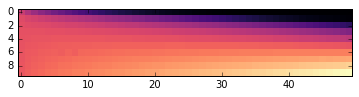

In [5]:
imshow(q,cmap='magma',interpolation='nearest')

In [13]:
d = np.zeros(50)
d[21] = 1.
g = np.dot(q,d)

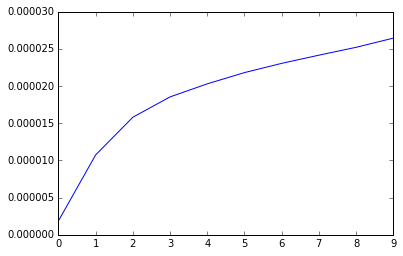

In [7]:
plot(g)

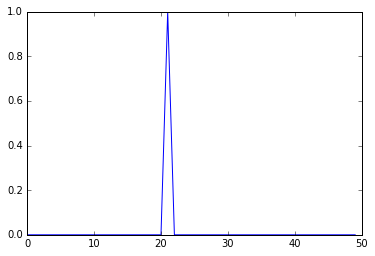

In [8]:
plot(d)

# Optimisation stuff

In [13]:
def grad(g,x):
        return -np.dot(q.T, g -  np.dot(q, x)  )

def cost(g,x):
        return np.norm(g - np.dot(q,x))

def soft_th(x, mu):
        return np.clip(abs(x) - mu,0,9999999)*np.sign(x)

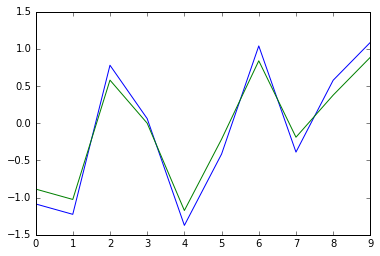

In [14]:
x = np.randn(10)
plot(x)
plot(soft_th(x,0.2))

In [47]:
import matplotlib.animation as animation

dpi = 100

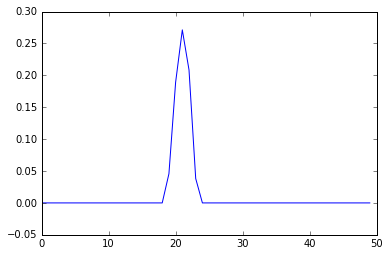

In [46]:
x = zeros(50)
xold = zeros(50)
told = 1.

def update_iter(n):
    x -= mu*grad(g,x)
    x = soft_th(x,mu*1e-9)
    t = (1 + sqrt(1.0 + 4. * told**2))/2
    x = x + (t -1.0)/told *(x - xold)
    xold = x*1.0
    told = t*1.0
    

for i in range(100000):
    x -= mu*grad(g,x)
    x = soft_th(x,mu*1e-9)
    t = (1 + sqrt(1.0 + 4. * told**2))/2
    x = x + (t -1.0)/told *(x - xold)
    xold = x*1.0
    told = t*1.0
plot(x)

In [20]:
mu

2223.2570494352144

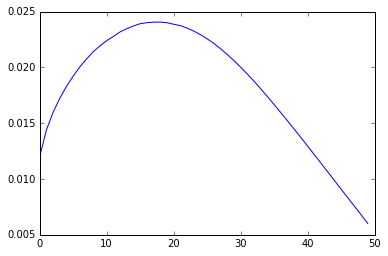

In [100]:
x = zeros(50)
for i in range(2):
    x -= mu2*grad2(g,x)
    u = nnls(p,-x)[0]
    x  = x - dot(p, u)
plot(dot(p,x))

In [85]:
x = randn(50)

In [89]:
u = nnls(p,x)[0]
y = dot(p,u)

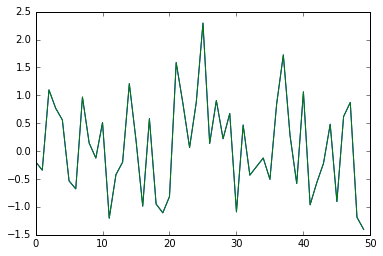

In [91]:
plot(x)
plot(y)

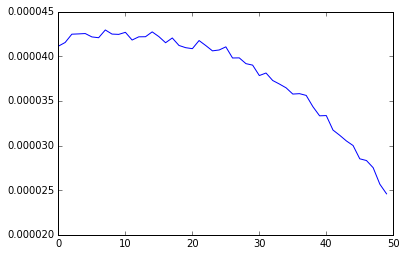

In [90]:
plot(u)